<a href="https://colab.research.google.com/github/in123-new/initialProject/blob/main/P1_TIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import cmath
from google.colab.patches import cv2_imshow
import skimage.measure as skm

# Manipulation 1

Lors de la création d’une image à partir de la première matrice i1, on obtient un dégradé de niveaux de gris du noir au blanc de gauche à droite de dimension 64x64.

Lors de la création d’une image à partir de la deuxième matrice i2, on obtient un carré blanc à bordure noire de dimension 8x8.

Lors de la création d’une image à partir de la troisième matrice i3 (qui est une reproduction 2x2 de la matrice i2), on obtient le résultat attendu qui est 4 carrés blancs à bordures noires de dimension 16x16.

Il est à noté que les images sont codées sur 8 bits (c'est-à-dire 256 niveaux de gris).



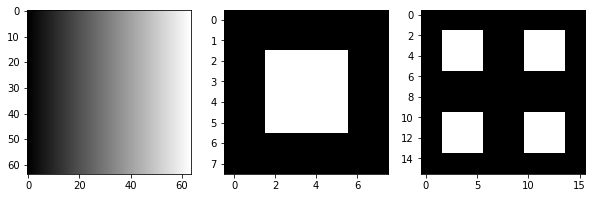

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.4)

a = [i for i in range(253) if i % 4 == 0]
b = [0, 0, 0, 0, 0, 0, 0, 0]
c = [0, 0, 1, 1, 1, 1, 0, 0]

i1 = [a.copy() for _ in range(64)]

i2 = [b.copy(), b.copy(), c.copy(), c.copy(), c.copy(), c.copy(), b.copy(), b.copy()]

i3 = np.vstack([np.hstack([i2, i2]), np.hstack([i2, i2])])

i1 = np.uint8(i1)
i2 = np.uint8(i2)
i3 = np.uint8(i3)

plt.subplot(1, 3, 1)
plt.imshow(i1, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(i2, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(i3, cmap='gray')

# Manipulation 2

Le uint8 représente les unsigned integer 8 (entiers positifs à 8 bits), c'est à dire que les valeurs possibles pour chaque channel de chaque pixel vont de 0 à 255.

Les yeux du mandrill sont très apparents sur la chaine rouge (contiennent beaucoup de rouge), moyennement apparents sur la chaine verte (contiennent un peu de vert), et très sombres sur la chaine bleue (ne contiennent pas de bleu).

On remarque qu'en intevertissant les chaines de couleurs, les niveaux de couleurs s'échangent et donnent différents types d'affichages.

En utilisant les deux façons différentes de passer aux niveaux de gris, on constate de légères différences entre les deux images (on remarque un nez un peu plus foncé avec la première méthode), sans doute dûes à l'utilisation de formules un peu différentes.

(512, 512, 3)
uint8


Text(0.5, 1.0, 'Passage en niveaux de gris en \nutilisant cv.cvtColor')

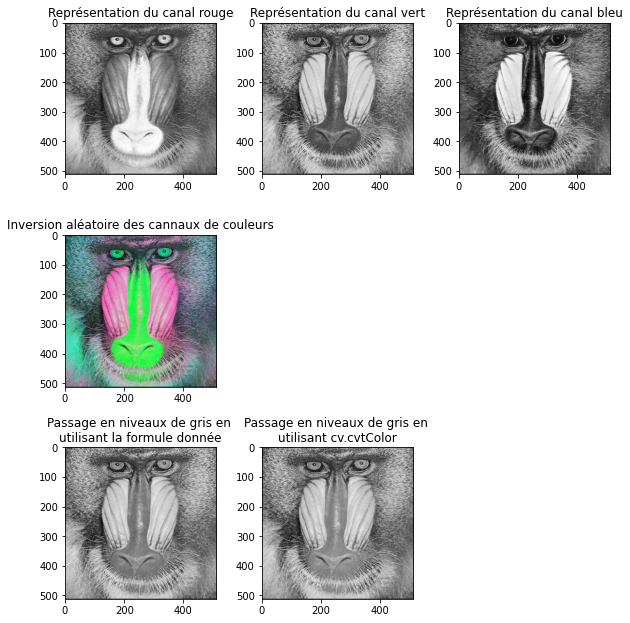

In [ ]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.4)

# Instruction 1:
img_orig = cv.imread("mandrill.png")
img = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

# Instruction 2:
print(img.shape)
print(img.dtype)

# Instruction 4:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

plt.subplot(3, 3, 1)
plt.imshow(r, cmap="gray")
plt.title("Représentation du canal rouge")
plt.subplot(3, 3, 2)
plt.imshow(g, cmap="gray")
plt.title("Représentation du canal vert")
plt.subplot(3, 3, 3)
plt.imshow(b, cmap="gray")
plt.title("Représentation du canal bleu")

# Instruction 6:
img_inv = np.zeros(img.shape, dtype="uint8")
img_inv[:, :, 0] = b
img_inv[:, :, 1] = r
img_inv[:, :, 2] = g

plt.subplot(3, 3, 4)
plt.imshow(img_inv)
plt.title("Inversion aléatoire des cannaux de couleurs")

# Instruction 7:
cv.imwrite("export/red.png", r)
cv.imwrite("export/green.bmp", g)
cv.imwrite("export/blue.jpeg", b)

# Instruction 8:
c_1 = 0.2126
c_2 = 0.7152
c_3 = 0.0722
plt.subplot(3, 3, 7)
plt.imshow(c_1 * r + c_2 * g + c_3 * b, cmap='gray')
plt.title("Passage en niveaux de gris en \nutilisant la formule donnée")

# Instruction 9:
plt.subplot(3, 3, 8)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY), cmap="gray")
plt.title("Passage en niveaux de gris en \nutilisant cv.cvtColor")

# Manipulation 3

L'image est de dimension 512x512 et de taille 135KB.

Après compression, la dimension idéale avant dégradation de l'image est de 128x128, on remarque que la taille de l'image baisse effectivement, mais pas de la manière attendue; la taille attendue serait de 128 x 128 = 16384 octets (16 kO), mais ce que l'on obtient est une image de taille 12.02 ko, et celà est dû à une autre compression faite cette fois-ci par l'ordinateur lors de l'enregistrement de l'image au format png.

Les faux contours apparaissent à partir de 8 niveaux de gris.

L'enregistrement de l'image quantifiée avec les faux contours qui apparaissent nous donnent un fichier de taille 35.09Ko, comparé à 135.92Ko pour le fichier original.
Le taux de réduction est donc de 135.92 / 34.34 ~= 3.96

(512, 512)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


False

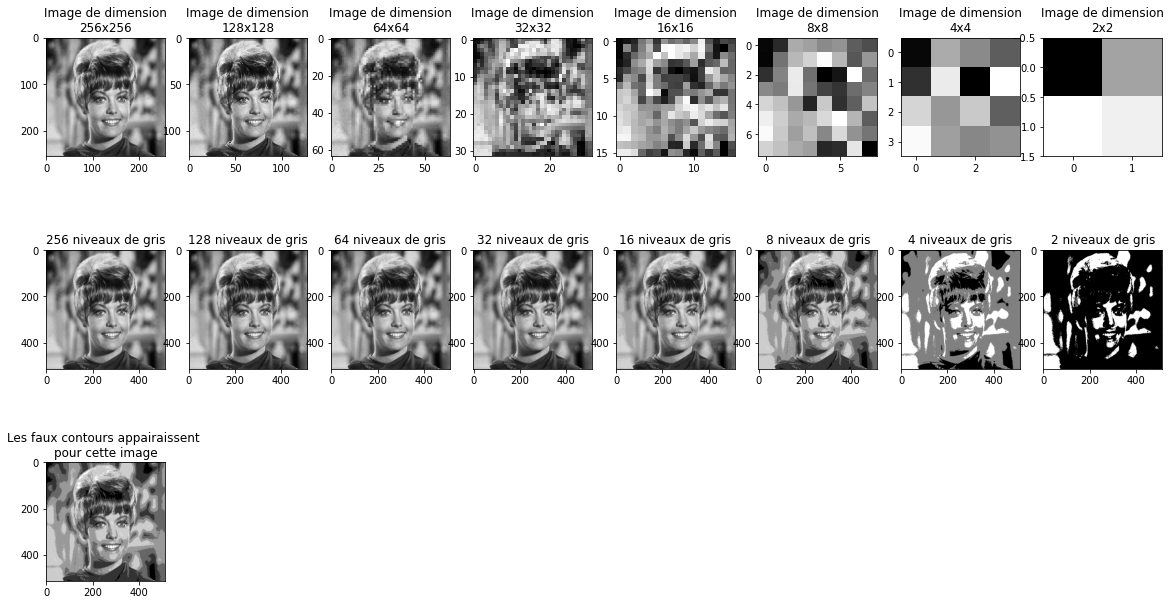

In [ ]:
img = cv.imread("zelda.png", 0)

print(img.shape)

plt.figure(figsize = (20,10))
plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.4)

# Instruction 2:
dim = 512
ec = img.copy()
for i in range(9):
    ec = ec[0:dim:2, 0:dim:2]
    dim = ec.shape[0]
    plt.subplot(3, 8, i+1)
    plt.imshow(ec, cmap="gray")
    plt.title('Image de dimension\n' + str(ec.shape[0]) + 'x' + str(ec.shape[1]))
    cv.imwrite("export/echantillonage_" + str(ec.shape[0]) + 'x' + str(ec.shape[1]) + ".png", ec)

# Instruction 3
for i in range(1, 9):
    nq = 2 ** (9 - i) - 1
    img_q = np.round(img*(nq/255))*(255/nq);
    plt.subplot(3, 8, 8+i)
    plt.title(str(2 ** (9 - i)) + ' niveaux de gris')
    plt.imshow(img_q, cmap="gray")

#Instruction 4
nq = 2 ** (9 - 6) - 1
img_q = np.round(img*(nq/255))*(255/nq);
plt.subplot(3, 8, 17)
plt.title('Les faux contours appairaissent \npour cette image')
plt.imshow(img_q, cmap="gray")

#Instruction 5
cv.imwrite("export/quantification.png", img_q)

# Manipulation 4

L'histogramme et l'histogramme normalisé ont exactement la même forme, sauf que l'un décrit le nombre d'occurences de chaque niveau de gris dans l'image tandis que l'autre décrit le % de chaque niveau de gris dans l'image.

L'histogramme cumulé montre une forte pente de ~20 à ~70 et de ~120 à ~200, ce qui voudrait dire que les niveaux de gris sur ces intervalles sont beaucoup plus présents que le reste.

L'histogramme égalisé est mieux réparti que l'histogramme original, il a aussi éliminé certains niveaux de gris (en les mettant dans le même "panier" que d'autres).

Les histogrammes obtenus par les deux méthodes sont pratiquement identiques.

In [ ]:
def equalize(img, cdf_normalized):
    img_eq = []
    for p in img.flatten():
        img_eq.append(np.round(255 * cdf_normalized[p]))
    img_eq = np.array(img_eq)
    img_eq.shape = img.shape
    return img_eq

In [ ]:
subs = (20, 1)
plt.figure(figsize = (15, 60))
plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.4)

# Instruction 1
img = cv.imread("flower.bmp")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(subs[0], subs[1], 1)
plt.imshow(img)
plt.title("Image originale")

# Instruction 2
img_g = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.subplot(subs[0], subs[1], 2)D
plt.imshow(img_g, cmap="gray")
plt.title("Image en niveaux de gris")

# Instruction 3
hist, bins = np.histogram(img_g.flatten(), 256, [0, 256])

plt.subplot(subs[0], subs[1], 3)
_ = plt.hist(img_g.flatten(), 256, [0,256], color='r')
plt.title("Histogramme")

plt.subplot(subs[0], subs[1], 4)
_ = plt.hist(img_g.flatten(), 256, [0,256], color='r', density=True)
plt.title("Histogramme normalisé")

# Instruction 4
cdf = hist.cumsum()
cdf_normalized = cdf / np.sum(hist)

plt.subplot(subs[0], subs[1], 5)
_ = plt.hist(img_g.flatten(), 256, [0,256], color='b', cumulative=True)
plt.plot(cdf, color='r')
plt.title("Histogramme cumulé")

# Instruction 5
img_g_eq = equalize(img_g, cdf_normalized)

plt.subplot(subs[0], subs[1], 6)
_ = plt.hist(img_g_eq.flatten(), 256, [0,256], color='r')
plt.title("Histogramme égalisé")

# Instruction 6
img_g_eq_2 = cv.equalizeHist(img_g)

plt.subplot(subs[0], subs[1], 7)
_ = plt.hist(img_g_eq_2.flatten(), 256, [0,256], color='r')
plt.title("Histogramme égalisé par cv.equalizeHist")

# Instruction 7
r = img[:, :, 0]
r_hist, r_bins = np.histogram(r.flatten(), 256, [0, 256])
r_cdf = r_hist.cumsum()
r_cdf_normalized = r_cdf / np.sum(r_hist)
r_eq = equalize(r, r_cdf_normalized)

g = img[:, :, 1]
g_hist, g_bins = np.histogram(g.flatten(), 256, [0, 256])
g_cdf = g_hist.cumsum()
g_cdf_normalized = g_cdf / np.sum(g_hist)
g_eq = equalize(g, g_cdf_normalized)

b = img[:, :, 2]
b_hist, b_bins = np.histogram(b.flatten(), 256, [0, 256])
b_cdf = b_hist.cumsum()
b_cdf_normalized = b_cdf / np.sum(b_hist)
b_eq = equalize(b, b_cdf_normalized)

img_eq = np.zeros(img.shape)
img_eq[:, :, 0] = r_eq
img_eq[:, :, 1] = g_eq
img_eq[:, :, 2] = b_eq
img_eq = img_eq.astype(int)

plt.subplot(subs[0], subs[1], 8)
plt.imshow(img_eq)
plt.title("Image couleur après égalisation indépendante")

entropy_1 = skm.shannon_entropy(img_eq)
print('Entropie de la première égalisation:' + str(entropy_1))

# Instruction 8
r_eq_2 = equalize(r, cdf_normalized)
g_eq_2 = equalize(g, cdf_normalized)
b_eq_2 = equalize(b, cdf_normalized)

img_eq_2 = np.zeros(img.shape)
img_eq_2[:, :, 0] = r_eq_2
img_eq_2[:, :, 1] = g_eq_2
img_eq_2[:, :, 2] = b_eq_2
img_eq_2 = img_eq_2.astype(int)

plt.subplot(subs[0], subs[1], 9)
plt.imshow(img_eq_2)
plt.title("Image couleur après égalisation par rapport à l'histogramme des niveaux de gris")

entropy_2 = skm.shannon_entropy(img_eq_2)
print('Entropie de la deuxième égalisation:' + str(entropy_2))

SyntaxError: ignored

On remarque que l'entropie de l'image égalisée par rapport à l'histogramme cumulé des niveaux de gris est inférieure à celle de l'image égalisée par rapport à chaque canal indépendament.

Les histogrammes sont aussi très différents, tels que les histogrammes des cannaux de la première égalisation ne sont pas restés à la ditribution (forme de l'histogramme) RGB originale tandis que la deuxième égalisation si (relativement).

In [ ]:
# Instruction 9
plt.figure(figsize = (20, 30))
plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.4)

print('entropie 1: {} > entropie 2: {}'.format(entropy_1, entropy_2))

plt.subplot(11, 1, 1)
_ = plt.hist(r_eq.flatten(), 256, [0,256], color='r')
plt.title('Canal rouge de la première image égalisée')
plt.subplot(9, 1, 2)
_ = plt.hist(g_eq.flatten(), 256, [0,256], color='g')
plt.title('Canal vert de la première image égalisée')
plt.subplot(9, 1, 3)
_ = plt.hist(b_eq.flatten(), 256, [0,256], color='b')
plt.title('Canal bleu de la première image égalisée')

plt.subplot(9, 1, 4)
_ = plt.hist(r_eq_2.flatten(), 256, [0,256], color='r')
plt.title('Canal rouge de la deuxième image égalisée')
plt.subplot(9, 1, 5)
_ = plt.hist(g_eq_2.flatten(), 256, [0,256], color='g')
plt.title('Canal vert de la deuxième image égalisée')
plt.subplot(9, 1, 6)
_ = plt.hist(b_eq_2.flatten(), 256, [0,256], color='b')
plt.title('Canal bleu de la deuxième image égalisée')

plt.subplot(9, 1, 7)
_ = plt.hist(r.flatten(), 256, [0,256], color='r')
plt.title('Canal rouge de l\'image originale')
plt.subplot(9, 1, 8)
_ = plt.hist(g.flatten(), 256, [0,256], color='g')
plt.title('Canal vert de l\'image originale')
plt.subplot(9, 1, 9)
_ = plt.hist(b.flatten(), 256, [0,256], color='b')
plt.title('Canal bleu de l\'image originale')

L'égalisation de l'histogramme de "pentagon.tif" a étalé les niveaux de gris sur un intervalle beaucoup plus large et donc l'image devient plus contrastée, le contraste donne de l'impact à une image et permet d'en distinguer plus de details surtout dans les zones les plus sombres.

In [ ]:
subs = (20, 1)
plt.figure(figsize = (20, 60))
plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.4)

# Instruction 10
img = cv.imread("pentagon.tif", 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

plt.subplot(subs[0], subs[1], 1)
_ = plt.hist(img.flatten(), 256, [0,256], color='r')
plt.title("Histogramme")

cdf = hist.cumsum()
cdf_normalized = cdf / np.sum(hist)

img_eq = equalize(img, cdf_normalized)

plt.subplot(subs[0], subs[1], 2)
_ = plt.hist(img_eq.flatten(), 256, [0,256], color='r')
plt.title("Histogramme égalisé")

plt.subplot(subs[0], subs[1], 3)
plt.imshow(img, cmap="gray")
plt.title("Image avant égalisation")

plt.subplot(subs[0], subs[1], 4)
plt.imshow(img_eq, cmap="gray")
plt.title("Image après égalisation")

Après l'égalisation, on remarque une certaina amélioration de contraste, et une sensation que les deux images (cameraman et barbara) viennent d'une même source plus ou moins.

In [ ]:
#instruction 11:
img_cam=cv.imread('cameraman.jpg',0)
plt.imshow(img_cam,cmap='gray')
plt.title('Image originale')

In [ ]:
img_barbara = cv.imread('barbara.png',0)
plt.imshow(img_barbara,cmap='gray')
plt.title('Image originale')

In [ ]:
#Numpy flatten image array and calculating histogram 
hist_array = np.bincount(np.asarray(img_barbara).flatten(), minlength=256)
#normalization
pixels_numbers = np.sum(hist_array)
hist_array = hist_array/pixels_numbers
#cumulative hist
chistogram_array = np.cumsum(hist_array)

#transformation
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(np.asarray(img_cam).flatten())
eq_img_list = [transform_map[p] for p in img_list]
#return into img array
eq_img_array = np.reshape(np.asarray(eq_img_list), np.asarray(img_cam).shape)
plt.imshow(eq_img_array,cmap='gray')
plt.title('Image après égalisation')

In [ ]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.4)

plt.subplot(1,3,1)
plt.imshow(img_cam,cmap='gray')
plt.title('Image originale')

plt.subplot(1,3,2)
plt.imshow(eq_img_array,cmap='gray')
plt.title('Image après égalisation')

plt.subplot(1,3,3)
plt.imshow(img_barbara,cmap='gray')
plt.title('Image barbara')